Anhang
==

In [1]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
import numpy as np
from numpy import exp, sqrt, log, pi
from scipy.optimize import curve_fit
from scipy.stats import chi2
from scipy import signal

def fehler(name, G, sig_G, G_lit, sig_G_lit):
    print(name)
    print('Relativer Fehler: ', sig_G / G * 100)
    print('Rel. Fehler (Vergleich):', sig_G_lit / G_lit * 100)
    print('Absoluter Fehler: ', np.abs(G - G_lit))
    print('Verhältnis:', G / G_lit)
    print('Sigma-Abweichung: ', np.abs(G - G_lit) / sqrt(sig_G ** 2 
                                                         + sig_G_lit ** 2),'\n')
    
    
def fehler_small(name, G, sig_G):
    print(name)
    print('Relativer Fehler: ', sig_G / G * 100)

VII.2 Messung der Wellenlänge
---

In [2]:
## Messdaten ##
s_a = np.array([1.088, 4.059, 1.099, 4.059, 1.098]) * 1e-3 # m
s_e = np.array([4.059, 1.099, 4.059, 1.098, 4.059]) * 1e-3
sig_sys_s = 9 * 1e-9 # m
Delta_s = np.abs(s_a - s_e)
m = np.array([11180, 11204, 11192, 11430, 11460])

# Fehler
Delta_s_mean = np.mean(Delta_s)
sig_std_Delta_s = 1 / sqrt(5) * np.std(Delta_s)
sig_sys_Delta_s = sqrt(2) * sig_sys_s
sig_Delta_s = sqrt(sig_std_Delta_s ** 2 + sig_sys_Delta_s ** 2)

m_mean = np.mean(m)
sig_std_m = 1 / sqrt(5) * np.std(m)

# Ausgabe
print('Delta_s =', np.round(1e3 * Delta_s_mean, 4), '+/-', 
      np.round(1e3 * sig_std_Delta_s, 4), '[std] +/-', 
      np.round(sig_sys_Delta_s,8),  '[sys] [10^-3 m]',
     '=', np.round(1e3 * Delta_s_mean, 4), '+/-', 
      np.round(1e3 * sig_std_Delta_s, 4), '[10^-3 m]')
print('m =', np.round(m_mean, -1), '+/-', np.round(sig_std_m, -1))

Delta_s = 2.9626 +/- 0.0019 [std] +/- 1e-08 [sys] [10^-3 m] = 2.9626 +/- 0.0019 [10^-3 m]
m = 11290.0 +/- 60.0


In [3]:
# Berechnung der Wellenlänge
lambda_1 = 2 * Delta_s_mean / m_mean # m
sig_lambda_1 = 2 * sqrt( (sig_Delta_s / m_mean) ** 2 
                        + (Delta_s_mean * sig_std_m / m_mean ** 2) ** 2 )

print('lambda =', np.round(1e9 * lambda_1, 1), '+/-', np.round(1e9 * sig_lambda_1, 1), '[10^-9 m]')

lambda = 524.7 +/- 2.6 [10^-9 m]


VII.3 Messung des Brechungsindex von Luft
--

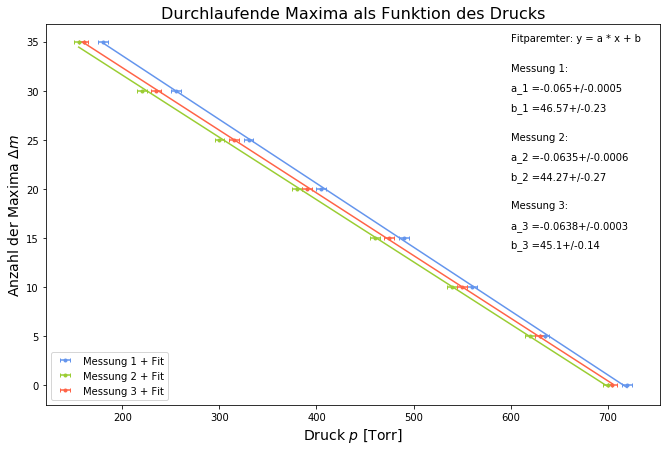

In [4]:
## Messdaten ##
p1 = np.array([720, 635, 560, 490, 405, 330, 255, 180]) # Torr
p2 = np.array([700, 620, 540, 460, 380, 300, 220, 155])
p3 = np.array([705, 630, 550, 475, 390, 315, 235, 160])
sig_p = 5
Delta_m = np.array([0, 5, 10, 15, 20, 25, 30, 35])

# Fit
def line(x, a, b):
    return a * x + b

popt_1, pcov_1 = curve_fit(line, p1, Delta_m)
popt_2, pcov_2 = curve_fit(line, p2, Delta_m)
popt_3, pcov_3 = curve_fit(line, p3, Delta_m)

a_1 = popt_1[0] # Torr^-1
sig_a_1 = sqrt(pcov_1[0, 0])
a_2 = popt_2[0]
sig_a_2 = sqrt(pcov_2[0, 0])
a_3 = popt_3[0]
sig_a_3 = sqrt(pcov_3[0, 0])

b_1 = popt_1[1]
sig_b_1 = sqrt(pcov_1[1, 1])
b_2 = popt_2[1]
sig_b_2 = sqrt(pcov_2[1, 1])
b_3 = popt_3[1]
sig_b_3 = sqrt(pcov_3[1, 1])

# Plot
plt.figure(figsize = (11, 7))
plt.errorbar(p1, Delta_m, xerr = sig_p, linestyle = 'None', fmt = '.', 
             capsize = 2, label = 'Messung 1 + Fit', color = 'cornflowerblue')
plt.errorbar(p2, Delta_m, xerr = sig_p, linestyle = 'None', fmt = '.', 
             capsize = 2, label = 'Messung 2 + Fit', color = 'yellowgreen')
plt.errorbar(p3, Delta_m, xerr = sig_p, linestyle = 'None', fmt = '.', 
             capsize = 2, label = 'Messung 3 + Fit', color = 'tomato')
plt.ylabel('Anzahl der Maxima $\Delta m$', size = 14)
plt.xlabel('Druck $p$ [Torr]', size = 14)
plt.title('Durchlaufende Maxima als Funktion des Drucks', size = 16)

plt.plot(p1, line(p1, *popt_1), color = 'cornflowerblue')
plt.plot(p2, line(p2, *popt_2), color = 'yellowgreen')
plt.plot(p3, line(p3, *popt_3), color = 'tomato')

plt.text(600, 35, 'Fitparemter: y = a * x + b')
plt.text(600, 32, 'Messung 1:')
plt.text(600, 30, 'a_1 =' + str(np.round(a_1, 4)) + '+/-' 
         + str(np.round(sig_a_1, 4)))
plt.text(600, 28, 'b_1 =' + str(np.round(b_1, 2)) + '+/-' 
         + str(np.round(sig_b_1, 2)))

plt.text(600, 25, 'Messung 2:')
plt.text(600, 23, 'a_2 =' + str(np.round(a_2, 4)) + '+/-' 
         + str(np.round(sig_a_2, 4)))
plt.text(600, 21, 'b_2 =' + str(np.round(b_2, 2)) + '+/-' 
         + str(np.round(sig_b_2, 2)))

plt.text(600, 18, 'Messung 3:')
plt.text(600, 16, 'a_3 =' + str(np.round(a_3, 4)) + '+/-' 
         + str(np.round(sig_a_3, 4)))
plt.text(600, 14, 'b_3 =' + str(np.round(b_3, 2)) + '+/-' 
         + str(np.round(sig_b_3, 2)))

plt.legend(loc = 'lower left')
plt.savefig('images/232/V232Diagramm1.png')


In [5]:
# Brechungsindex
a = np.abs(np.mean([a_1, a_2, a_3]))
sig_a = 1 / sqrt(3) * np.std([a_1, a_2, a_3])
T0 = 273.15 # K
T = 24.1 + 273.15
sig_T = 0.1
p0 = 760 # Torr
d = 0.05 # m
sig_d = 0.00005

n_0 = a * lambda_1 * p0 * T / (2 * d * T0) + 1
sig_n_0 = n_0 * sqrt( (sig_a / a) ** 2 + (sig_T / T) ** 2 + (sig_d / d) ** 2 
               + (sig_lambda_1 / lambda_1) ** 2)

print('n_0 =', np.round(n_0, 3), '+/-', np.round(sig_n_0, 3))

n_0 = 1.0 +/- 0.008


VII.4 Messung der Kohärenzlänge der Leuchtdiode
---

In [6]:
## Messdaten ##
data=np.genfromtxt('data/232/F0001CH1.CSV', delimiter=",",skip_header=18) 

t = data[:,3:4] 
t = t[:, 0] 

U = data[:,4:5] 
U = U[:, 0] 

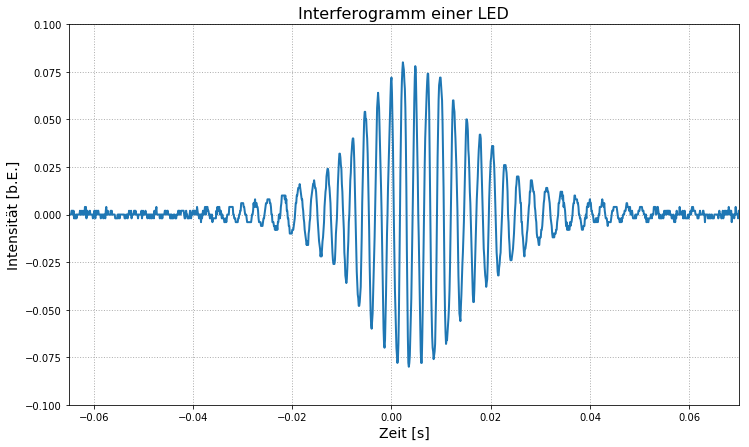

In [7]:
# Plot
plt.figure(figsize = (12, 7))
plt.plot(t, U,  linewidth = 2)
plt.axis([-0.065, 0.07, -0.1, 0.1])
plt.grid(linestyle = "dotted", linewidth = 1)
plt.title('Interferogramm einer LED', size = 16)
plt.ylabel('Intensität [b.E.]', size = 14)
plt.xlabel('Zeit [s]', size = 14)

plt.savefig('images/232/V232Diagramm2.png')

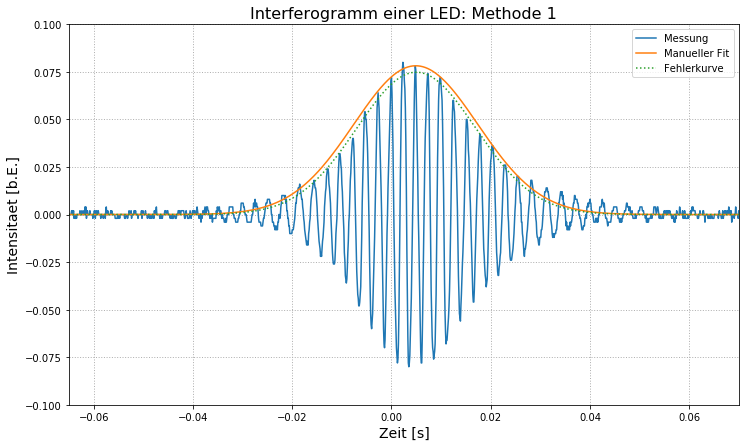

In [8]:
# Gauss Fit: Methode 1
def gauss(t, a, mu, sig):
    return a / (sqrt(2 * pi) * sig) * exp(-(t - mu) ** 2 / (2 * sig ** 2))

a_4_a = 0.00245
mu_4_a = 0.0049
sig_4_a = 0.0125
sig_sig_4_a = 0.0005

a_4_b = 0.00225
mu_4_b = 0.005
sig_4_b = 0.012

plt.figure(figsize = (12, 7))
plt.plot(t, U, label = 'Messung') 
plt.xlabel('Zeit [s]', size = 14)
plt.ylabel('Intensitaet [b.E.]', size = 14) 
plt.title('Interferogramm einer LED: Methode 1', size = 16) 
plt.axis([-0.065, 0.07, -0.1, 0.1])
plt.plot(t, gauss(t, a_4_a, mu_4_a, sig_4_a), label = 'Manueller Fit')
plt.plot(t, gauss(t, a_4_b, mu_4_b, sig_4_b), label = 'Fehlerkurve', 
         linestyle = 'dotted')
plt.grid(linestyle = "dotted", linewidth = 1)
plt.legend(loc = 'best')

plt.savefig('images/232/V232Diagramm3.png')

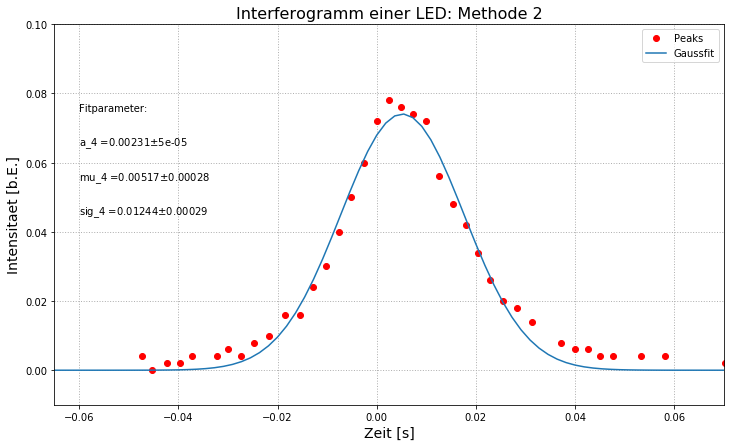

In [9]:
# Gauss Fit: Methode 2
peakind = signal.find_peaks_cwt(U, np.arange(1, 30), noise_perc = 100)

# Fit
def gaussian(t, a, mu, sig):
    return a / sqrt(2 * pi) / sig * exp(-(t - mu) ** 2 / (2 * sig ** 2))

p0 = [0.0025, 0.005, 0.0125]
popt_4, pcov_4 = curve_fit(gaussian, t[peakind], U[peakind], p0)

a_4_2 = popt_4[0]
sig_a_4_2 = sqrt(pcov_4[0, 0])
mu_4_2 = popt_4[1]
sig_mu_4_2 = sqrt(pcov_4[1, 1])
sig_4_2 = popt_4[2]
sig_sig_4_2 = sqrt(pcov_4[2, 2])

x=np.linspace(-0.08,0.1,100)

plt.figure(figsize = (12, 7))
plt.plot(t[peakind], U[peakind], marker = 'o',linewidth=0, color = 'red',
        label = 'Peaks') 
plt.plot(x, gaussian(x, *popt_4), label = "Gaussfit")
plt.text(-0.06, 0.075, 'Fitparameter:')
plt.text(-0.06, 0.065, 'a_4 =' + str(np.round(a_4_2, 5)) + '$\pm$' 
         + str(np.round(sig_a_4_2, 5)))
plt.text(-0.06, 0.055, 'mu_4 =' + str(np.round(mu_4_2, 5)) + '$\pm$' 
         + str(np.round(sig_mu_4_2, 5)))
plt.text(-0.06, 0.045, 'sig_4 =' + str(np.round(sig_4_2, 5)) + '$\pm$' 
         + str(np.round(sig_sig_4_2, 5)))
plt.xlabel('Zeit [s]', size = 14)
plt.ylabel('Intensitaet [b.E.]', size = 14) 
plt.title('Interferogramm einer LED: Methode 2', size = 16) 
plt.axis([-0.065, 0.07, -0.01, 0.1])
plt.grid(linestyle = "dotted", linewidth = 1)
plt.legend(loc = 'best')

plt.savefig('images/232/V232Diagramm4.png')

In [10]:
# Bestimmung der Kohärenzlänge: Methode 1
v = 1e-4 # m s^-1 Verfahrengeschwindigkeit

fwhm_1 = 2 * sqrt(2 * log(2)) * sig_4_a
sig_fwhm_1 = 2 * sqrt(2 * log(2)) * sig_sig_4_a

l_k_1 = fwhm_1 * v
sig_l_k_1 = sig_fwhm_1 * v

print('FWHM_1 =', np.round(fwhm_1, 4), '+/-', np.round(sig_fwhm_1, 4), '[s]') 
print('l_k_1 =', np.round(1e6 * l_k_1, 2), '+/-', np.round(1e6 * sig_l_k_1, 2), '[10^-6 m]')

FWHM_1 = 0.0294 +/- 0.0012 [s]
l_k_1 = 2.94 +/- 0.12 [10^-6 m]


In [11]:
# Bestimmung der Kohärenzlänge: Methode 2

fwhm_2 = 2 * sqrt(2 * log(2)) * sig_4_2
sig_fwhm_2 = 2 * sqrt(2 * log(2)) * sig_sig_4_2

l_k_2 = fwhm_2 * v
sig_l_k_2 = sig_fwhm_2 * v

print('FWHM_2 =', np.round(fwhm_2, 4), '+/-', np.round(sig_fwhm_2, 4), '[s]') 
print('l_k_2 =', np.round(1e6 * l_k_2, 2), '+/-', np.round(1e6 * sig_l_k_2, 2), '[10^-6 m]')

FWHM_2 = 0.0293 +/- 0.0007 [s]
l_k_2 = 2.93 +/- 0.07 [10^-6 m]


VII.4.2 Messung der Kohärenzlänge der Leuchtdiode: Alternative Messdaten
---

Methode 1:
FWHM_b_1 = 0.0294 +/- 0.0012 [s]
l_k_b_1 = 2.94 +/- 0.12 [10^-6 m]

Methode 2:
FWHM_b_2 = 0.033 +/- 0.0014 [s]
l_k_b_2 = 3.3 +/- 0.14 [10^-6 m]


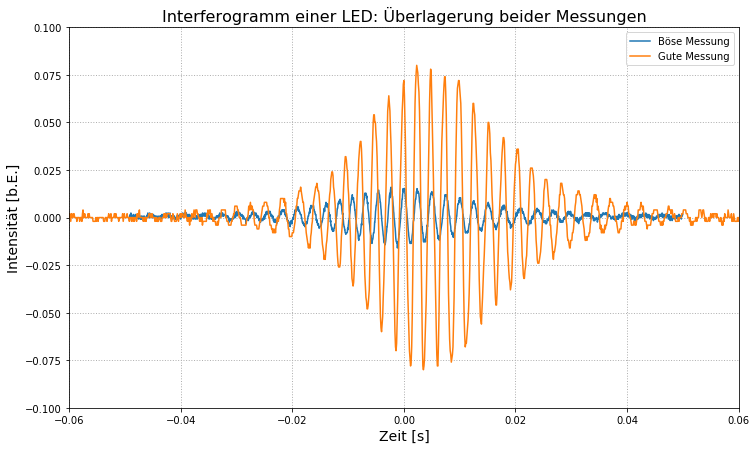

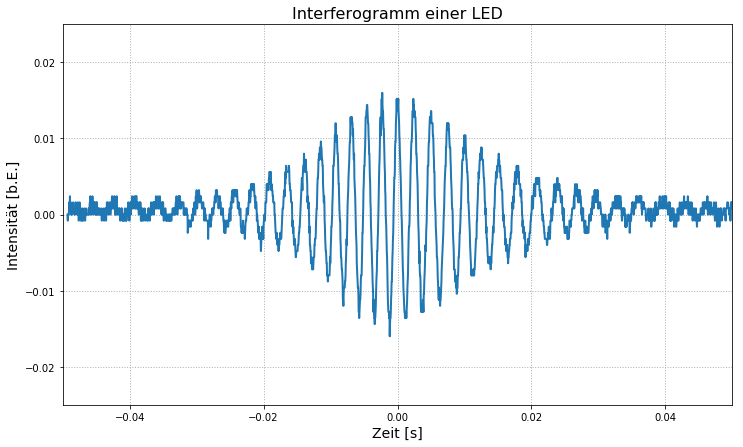

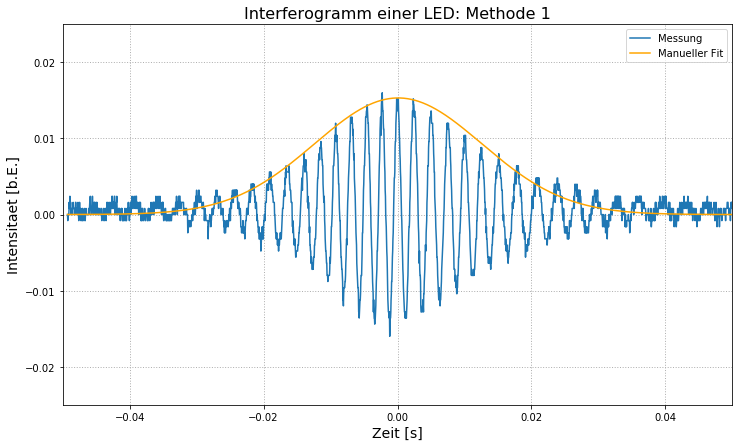

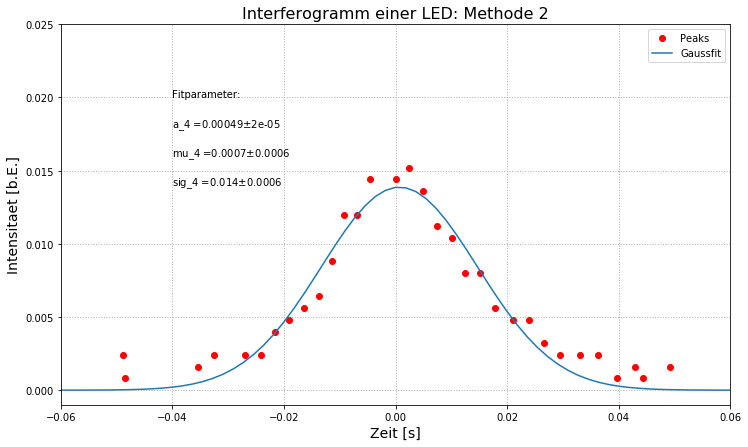

In [12]:
## Messdaten ##
# Neue Messung: In einer Zelle um die Variablen im Vakuum zu halten
data = np.genfromtxt('data/232/F0000CH1.CSV', delimiter=",",skip_header=18) 

t = data[:,3:4] 
t = t[:, 0] 

U = data[:,4:5] 
U = U[:, 0] - 0.212 # Anpassung weil Mittelwert um 0.2

# Alte
data_og = np.genfromtxt('data/232/F0001CH1.CSV', delimiter=",",skip_header=18) 

t_og = data_og[:,3:4] 
t_og = t_og[:, 0] 

U_og = data_og[:,4:5] 
U_og = U_og[:, 0] 

# Gegeneinander
plt.figure(figsize = (12, 7))
plt.plot(t, U, label = 'Böse Messung')
plt.plot(t_og, U_og, label = 'Gute Messung')
plt.axis([-0.06, 0.06, -0.1, 0.1])
plt.grid(linestyle = "dotted", linewidth = 1)
plt.title('Interferogramm einer LED: Überlagerung beider Messungen', size = 16)
plt.ylabel('Intensität [b.E.]', size = 14)
plt.xlabel('Zeit [s]', size = 14)
plt.legend(loc = 'best')

plt.savefig('images/232/V232Diagramm5.png')

# Plot
plt.figure(figsize = (12, 7))
plt.plot(t, U,  linewidth = 2)
plt.axis([-0.05, 0.05, -0.025, 0.025])
plt.grid(linestyle = "dotted", linewidth = 1)
plt.title('Interferogramm einer LED', size = 16)
plt.ylabel('Intensität [b.E.]', size = 14)
plt.xlabel('Zeit [s]', size = 14)

plt.savefig('images/232/V232Diagramm2.2.png')


# Gauss Fit: Methode 1

a_b = 0.00048
mu_b = 0.0001
sig_b = 0.0125
sig_sig_b = 0.0005

plt.figure(figsize = (12, 7))
plt.plot(t, U, label = 'Messung') 
plt.xlabel('Zeit [s]', size = 14)
plt.ylabel('Intensitaet [b.E.]', size = 14) 
plt.title('Interferogramm einer LED: Methode 1', size = 16) 
plt.axis([-0.05, 0.05, -0.025, 0.025])
plt.plot(t, gauss(t, a_b, mu_b, sig_b), color = 'orange', label = 'Manueller Fit')
plt.grid(linestyle = "dotted", linewidth = 1)
plt.legend(loc = 'best')

plt.savefig('images/232/V232Diagramm3.2.png')


# Gauss Fit: Methode 2
peakind = signal.find_peaks_cwt(U, np.arange(1, 30), noise_perc = 100)

# Fit
def gaussian(t, a, mu, sig):
    return a / sqrt(2 * pi) / sig * exp(-(t - mu) ** 2 / (2 * sig ** 2))

p0 = [0.0005, 0.005, 0.0125]
popt_4, pcov_4 = curve_fit(gaussian, t[peakind], U[peakind], p0)

a_b_2 = popt_4[0]
sig_a_b_2 = sqrt(pcov_4[0, 0])
mu_b_2 = popt_4[1]
sig_mu_b_2 = sqrt(pcov_4[1, 1])
sig_b_2 = popt_4[2]
sig_sig_b_2 = sqrt(pcov_4[2, 2])

x=np.linspace(-0.08,0.1,100)

plt.figure(figsize = (12, 7))
plt.plot(t[peakind], U[peakind], marker = 'o',linewidth=0, color = 'red',
        label = 'Peaks') 
plt.plot(x, gaussian(x, *popt_4), label = "Gaussfit")
plt.text(-0.04, 0.020, 'Fitparameter:')
plt.text(-0.04, 0.018, 'a_4 =' + str(np.round(a_b_2, 5)) + '$\pm$' + str(np.round(sig_a_b_2, 5)))
plt.text(-0.04, 0.016, 'mu_4 =' + str(np.round(mu_b_2, 4)) + '$\pm$' + str(np.round(sig_mu_b_2, 4)))
plt.text(-0.04, 0.014, 'sig_4 =' + str(np.round(sig_b_2, 4)) + '$\pm$' + str(np.round(sig_sig_b_2, 4)))
plt.xlabel('Zeit [s]', size = 14)
plt.ylabel('Intensitaet [b.E.]', size = 14) 
plt.title('Interferogramm einer LED: Methode 2', size = 16) 
plt.axis([-0.06, 0.06, -0.001, 0.025])
plt.grid(linestyle = "dotted", linewidth = 1)
plt.legend(loc = 'best')

plt.savefig('images/232/V232Diagramm4.2.png')

# Bestimmung der Kohärenzlänge: Methode 1
print('Methode 1:')
fwhm_b_1 = 2 * sqrt(2 * log(2)) * sig_b
sig_fwhm_b_1 = 2 * sqrt(2 * log(2)) * sig_sig_b

l_k_b_1 = fwhm_b_1 * v
sig_l_k_b_1 = sig_fwhm_b_1 * v

print('FWHM_b_1 =', np.round(fwhm_b_1, 4), '+/-', np.round(sig_fwhm_b_1, 4), '[s]') 
print('l_k_b_1 =', np.round(1e6 * l_k_b_1, 2), '+/-', np.round(1e6 * sig_l_k_b_1, 2), '[10^-6 m]')

# Methode 2
print('\nMethode 2:')
fwhm_b_2 = 2 * sqrt(2 * log(2)) * sig_b_2
sig_fwhm_b_2 = 2 * sqrt(2 * log(2)) * sig_sig_b_2

l_k_b_2 = fwhm_b_2 * v
sig_l_k_b_2 = sig_fwhm_b_2 * v

print('FWHM_b_2 =', np.round(fwhm_b_2, 4), '+/-', np.round(sig_fwhm_b_2, 4), '[s]') 
print('l_k_b_2 =', np.round(1e6 * l_k_b_2, 2), '+/-', np.round(1e6 * sig_l_k_b_2, 2), '[10^-6 m]')

Sigmas
--

In [13]:
# Lambda Lit
lambda_lit = 532 * 1e-9 # m
sig_lambda_lit = 1e-9
fehler('lambda',np.round(lambda_1, 10), np.round(sig_lambda_1, 10), lambda_lit, sig_lambda_lit)

lambda
Relativer Fehler:  0.49552125023823135
Rel. Fehler (Vergleich): 0.18796992481203006
Absoluter Fehler:  7.300000000000019e-09
Verhältnis: 0.9862781954887218
Sigma-Abweichung:  2.6205472789547506 



In [14]:
# n Lit
n_lit = 1.00028
fehler('n_0', np.round(n_0, 3), np.round(sig_n_0, 3), n_lit, 0)

n_0
Relativer Fehler:  0.8
Rel. Fehler (Vergleich): 0.0
Absoluter Fehler:  0.000280000000000058
Verhältnis: 0.9997200783780541
Sigma-Abweichung:  0.03500000000000725 



In [15]:
# l_k_1 - l_k_2
fehler('l_k_1 - l_k_2', l_k_1, sig_l_k_1, l_k_2, sig_l_k_2)

l_k_1 - l_k_2
Relativer Fehler:  4.0
Rel. Fehler (Vergleich): 2.3244312585105344
Absoluter Fehler:  1.300488462450178e-08
Verhältnis: 1.0044377393304604
Sigma-Abweichung:  0.09560607324327101 



In [16]:
# l_k_1 - l_k_b_2
fehler('l_k_1 - l_k_b_2', l_k_1, sig_l_k_1, l_k_b_2, sig_l_k_b_2)

l_k_1 - l_k_b_2
Relativer Fehler:  4.0
Rel. Fehler (Vergleich): 4.163149950709182
Absoluter Fehler:  3.5579988885165485e-07
Verhältnis: 0.8921597918459891
Sigma-Abweichung:  1.966688810520832 



In [17]:
# l_k_2 - l_k_b_2
fehler('l_k_2 - l_k_b_2', l_k_2, sig_l_k_2, l_k_b_2, sig_l_k_b_2)

l_k_2 - l_k_b_2
Relativer Fehler:  2.3244312585105344
Rel. Fehler (Vergleich): 4.163149950709182
Absoluter Fehler:  3.6880477347615663e-07
Verhältnis: 0.8882181113990065
Sigma-Abweichung:  2.4054752080717097 

